In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mido
import librosa.display
import tensorflow as tf
%matplotlib inline
import sklearn 

In [28]:
x, sr = librosa.load('MAPS_UCHO_C0-1-3-5-8_I32-96_S1_n7_ENSTDkAm.wav') 

In [48]:
x1, sr1 = librosa.load('song1_3.wav') 

In [30]:
import IPython.display as ipd

ipd.Audio('MAPS_UCHO_C0-1-3-5-8_I32-96_S1_n7_ENSTDkAm.wav')

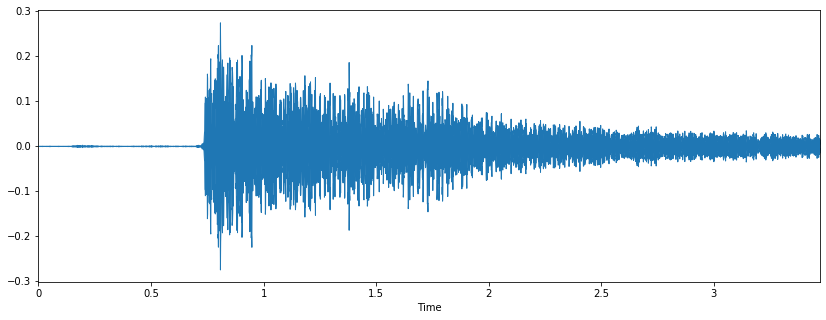

In [31]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

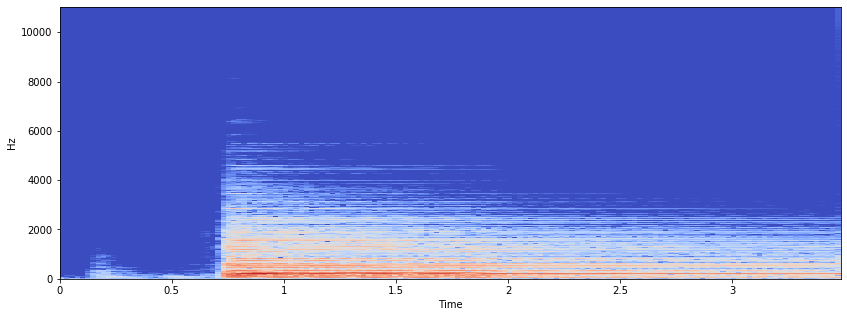

In [32]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [33]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
onset_times = librosa.frames_to_time(onset_frames)

In [57]:
print(onset_frames)

[32]


In [34]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

In [35]:
print(len(S))

1025


In [36]:
mfcc = librosa.feature.mfcc(y=x, sr=sr, hop_length=512, n_mfcc=13)

In [49]:
mfcc1 = librosa.feature.mfcc(y=x1, sr=sr1, hop_length=512, n_mfcc=13)

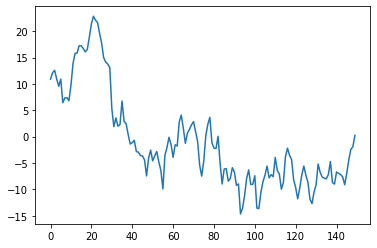

In [37]:
plt.plot(mfcc[6])

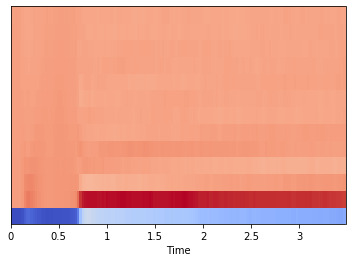

In [42]:
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

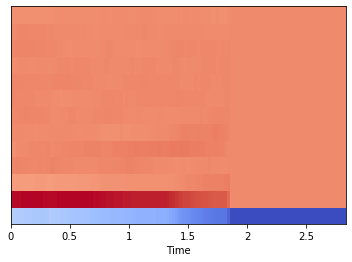

In [50]:
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')

In [43]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.0000000e+00 -1.2715658e-08  0.0000000e+00  0.0000000e+00
 -1.2715658e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.7815501e-09  0.0000000e+00  0.0000000e+00  6.3578289e-09
 -1.2715658e-08]
[0.9999999 1.0000001 1.        0.9999998 1.        1.0000001 1.0000001
 1.        1.        1.        1.        1.        1.0000001]


/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [51]:
mfccs1 = sklearn.preprocessing.scale(mfcc1, axis=1)
print(mfccs1.mean(axis=1))
print(mfccs1.var(axis=1))

[ 3.2245136e-08 -1.7588256e-08  1.2702629e-08  9.7712527e-10
  1.4656880e-09 -9.4659018e-09 -5.7406111e-09  6.1757373e-09
  1.3679754e-08 -1.0076605e-08 -1.6137836e-08 -9.7712527e-10
 -1.7588256e-08]
[0.99999994 1.0000002  0.9999999  1.0000001  1.0000004  1.0000002
 1.0000001  0.9999998  0.9999999  1.0000002  0.9999999  0.9999999
 0.99999994]


/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


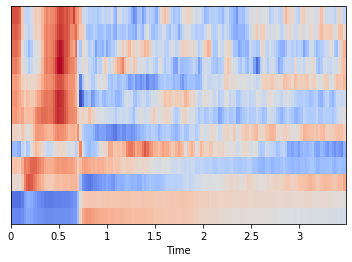

In [44]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

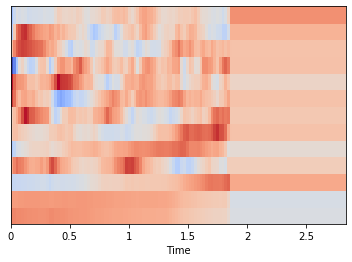

In [55]:
librosa.display.specshow(mfccs1, sr=sr1, x_axis='time')

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


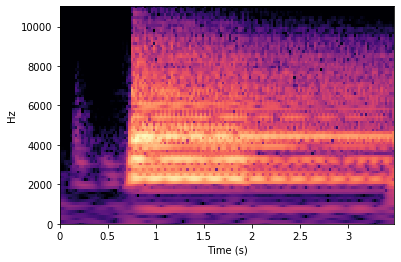

In [45]:
C = librosa.cqt(x, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),x_axis = 's', y_axis = 'linear', hop_length = 512,
                            sr=sr)

In [46]:
S = librosa.vqt(x)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), x_axis = 's', y_axis = 'linear',
                            sr=sr)

AttributeError: module 'librosa' has no attribute 'vqt'

In [ ]:
d = pd.DataFrame('MAPS_UCHO_C0-1-3-5-8_I32-96_S1_n4_ENSTDkAm.txt')

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


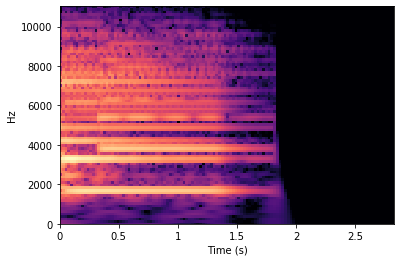

In [54]:
C = librosa.cqt(x1, sr=sr1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),x_axis = 's', y_axis = 'linear', hop_length = 512,
                            sr=sr)

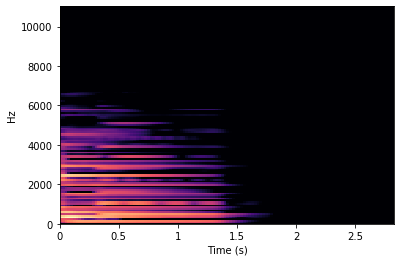

In [61]:
M = librosa.feature.melspectrogram(x1, sr=sr1, n_fft = 4096)
librosa.display.specshow(librosa.amplitude_to_db(M, ref=np.max),x_axis = 's', y_axis = 'linear', hop_length = 512,
                            sr=sr)

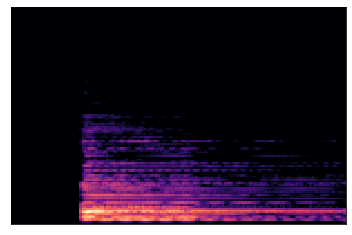

In [65]:
M = librosa.feature.melspectrogram(x, sr=sr, n_fft = 2048)
librosa.display.specshow(librosa.amplitude_to_db(M, ref=np.max),
                            sr=sr)

In [2]:
import pretty_midi
midi_pretty_format = pretty_midi.PrettyMIDI('MAPS_ISOL_NO_F_S0_M23_ENSTDkAm.mid')
piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
piano_roll = piano_midi.get_piano_roll(fs=100)

In [16]:
len(piano_roll[0])

252

In [18]:
import pretty_midi
midi_pretty_format = pretty_midi.PrettyMIDI('MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi')
piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
piano_roll = piano_midi.get_piano_roll(fs=100)

In [23]:
for i in range(len(piano_roll)):
    print(str(i) + "\t"+ str(len(piano_roll[i])))

0	96902
1	96902
2	96902
3	96902
4	96902
5	96902
6	96902
7	96902
8	96902
9	96902
10	96902
11	96902
12	96902
13	96902
14	96902
15	96902
16	96902
17	96902
18	96902
19	96902
20	96902
21	96902
22	96902
23	96902
24	96902
25	96902
26	96902
27	96902
28	96902
29	96902
30	96902
31	96902
32	96902
33	96902
34	96902
35	96902
36	96902
37	96902
38	96902
39	96902
40	96902
41	96902
42	96902
43	96902
44	96902
45	96902
46	96902
47	96902
48	96902
49	96902
50	96902
51	96902
52	96902
53	96902
54	96902
55	96902
56	96902
57	96902
58	96902
59	96902
60	96902
61	96902
62	96902
63	96902
64	96902
65	96902
66	96902
67	96902
68	96902
69	96902
70	96902
71	96902
72	96902
73	96902
74	96902
75	96902
76	96902
77	96902
78	96902
79	96902
80	96902
81	96902
82	96902
83	96902
84	96902
85	96902
86	96902
87	96902
88	96902
89	96902
90	96902
91	96902
92	96902
93	96902
94	96902
95	96902
96	96902
97	96902
98	96902
99	96902
100	96902
101	96902
102	96902
103	96902
104	96902
105	96902
106	96902
107	96902
108	96902
109	96902
110	96902


In [8]:
import pretty_midi
midi_pretty_format = pretty_midi.PrettyMIDI('song3_8.mid')
piano_midi = midi_pretty_format.instruments[0] # Get the piano channels
piano_roll = piano_midi.get_piano_roll(fs=100)

In [9]:
for i in range(len(piano_roll)):
    print(str(i) + "\t"+ str(max(piano_roll[i])))
print(len(piano_roll[0]))

0	0.0
1	0.0
2	0.0
3	0.0
4	0.0
5	0.0
6	0.0
7	0.0
8	0.0
9	0.0
10	0.0
11	0.0
12	0.0
13	0.0
14	0.0
15	0.0
16	0.0
17	0.0
18	0.0
19	0.0
20	0.0
21	0.0
22	0.0
23	0.0
24	0.0
25	0.0
26	0.0
27	0.0
28	0.0
29	0.0
30	0.0
31	0.0
32	0.0
33	0.0
34	0.0
35	0.0
36	0.0
37	0.0
38	0.0
39	0.0
40	0.0
41	0.0
42	0.0
43	0.0
44	0.0
45	0.0
46	0.0
47	0.0
48	0.0
49	0.0
50	0.0
51	0.0
52	0.0
53	0.0
54	0.0
55	0.0
56	0.0
57	0.0
58	0.0
59	0.0
60	0.0
61	0.0
62	0.0
63	0.0
64	0.0
65	0.0
66	0.0
67	0.0
68	0.0
69	0.0
70	72.0
71	0.0
72	0.0
73	0.0
74	0.0
75	0.0
76	0.0
77	0.0
78	0.0
79	0.0
80	0.0
81	0.0
82	0.0
83	0.0
84	0.0
85	0.0
86	0.0
87	0.0
88	0.0
89	0.0
90	0.0
91	0.0
92	0.0
93	0.0
94	0.0
95	0.0
96	0.0
97	0.0
98	0.0
99	0.0
100	0.0
101	0.0
102	0.0
103	0.0
104	0.0
105	0.0
106	0.0
107	0.0
108	0.0
109	0.0
110	0.0
111	0.0
112	0.0
113	0.0
114	0.0
115	0.0
116	0.0
117	0.0
118	0.0
119	0.0
120	0.0
121	0.0
122	0.0
123	0.0
124	0.0
125	0.0
126	0.0
127	0.0
2042


In [7]:
print(piano_roll[62])

[ 0.  0.  0. ... 72. 72. 72.]


In [54]:
import numpy as np 
import pandas as pd

s = np.array2string(piano_roll[70])

In [55]:
s


'[ 0.  0.  0. ... 72. 72. 72.]'

In [56]:
s.split(" ")

['[', '0.', '', '0.', '', '0.', '...', '72.', '72.', '72.]']

In [ ]:
for i in range(len(s.split(" "))):
    print(str(i)+ "\t"+ str(s))